In [35]:
#data libraries
import numpy as np
import pandas as pd

#visulization libraries
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the datasets
movies = pd.read_csv('../archive/movies.csv')
links = pd.read_csv('../archive/links.csv')
ratings = pd.read_csv('../archive/ratings.csv')
tags = pd.read_csv('../archive/tags.csv')

print(movies.shape, links.shape, ratings.shape, tags.shape)

(9742, 3) (9742, 3) (100836, 4) (3683, 4)


In [9]:
#view the heads of the data
#view the infos of the data
movies.head(5)
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [10]:
links.head(5)
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [12]:
tags.head(5)
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [13]:
ratings.head(5)
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [16]:
print(tags['tag'].value_counts())

tag
In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
funny                 23
                    ... 
small towns            1
In Your Eyes           1
Lloyd Dobbler          1
weak plot              1
Heroic Bloodshed       1
Name: count, Length: 1589, dtype: int64


In [21]:
print(ratings['rating'].mean())
print(movies['genres'].value_counts())
print(ratings['userId'].value_counts())

3.501556983616962
genres
Drama                                                  1053
Comedy                                                  946
Comedy|Drama                                            435
Comedy|Romance                                          363
Drama|Romance                                           349
                                                       ... 
Action|Crime|Horror|Mystery|Thriller                      1
Adventure|Animation|Children|Comedy|Musical|Romance       1
Action|Adventure|Animation|Comedy|Crime|Mystery           1
Children|Comedy|Fantasy|Sci-Fi                            1
Action|Animation|Comedy|Fantasy                           1
Name: count, Length: 951, dtype: int64
userId
414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Name: count, Length: 610, dtype: int64


In [23]:
print(movies['movieId'].value_counts())
print(len(ratings['rating']))

movieId
1         1
53322     1
53129     1
53138     1
53140     1
         ..
4390      1
4392      1
4393      1
4394      1
193609    1
Name: count, Length: 9742, dtype: int64
100836


In [26]:
#drop some useless attribution
ratings.drop(columns='timestamp', inplace=True)
tags.drop(columns='timestamp', inplace=True)

In [28]:
#Extracting the year from the title
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=False)
movies.head(5)

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [32]:
#Seperate the genres and encoding with One-Hot Encoding Method
genres = []
for i in range(len(movies.genres)):
    for x in movies.genres[i].split('|'):
        if x not in genres:
            genres.append(x)
print(len(genres))
genres

20


['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'War',
 'Musical',
 'Documentary',
 'IMAX',
 'Western',
 'Film-Noir',
 '(no genres listed)']

In [36]:
for x in genres:
    movies[x] = 0
for i in range(len(movies.genres)):
    for x in movies.genres[i].split('|'):
        movies[x][i] = 1
movies.head(5)

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
movies.head(4)

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


Adventure 				1263
Animation 				611
Children 				664
Comedy 				3756
Fantasy 				779
Romance 				1596
Drama 				4361
Action 				1828
Crime 				1199
Thriller 				1894
Horror 				978
Mystery 				573
Sci-Fi 				980
War 				382
Musical 				334
Documentary 				440
IMAX 				158
Western 				167
Film-Noir 				87
(no genres listed) 				34


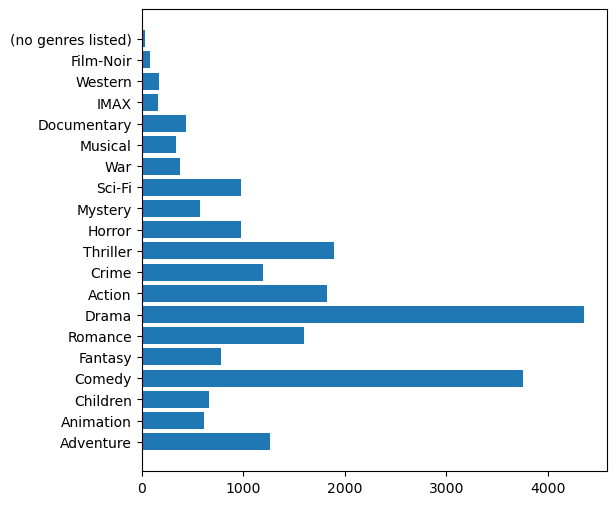

In [80]:
x = {}
for i in movies.columns[4:]:
    # print(i)
    x[i] = movies[i].value_counts()[1]
    print("{} \t\t\t\t{}".format(i, x[i]))
# x
# plt.bar(height=x.values(), x=x.keys())
plt.barh(y=list(x.keys()), width=list(x.values()))
# plt.gca().invert_xaxis()
# plt.show()
plt.gcf().set_size_inches(6,6)
plt.savefig('../img/genres.png', bbox_inches='tight')
pass

In [86]:
# movies.drop(columns='rating_x',inplace=True)
# movies.drop(columns='rating_y', inplace=True)
movies.head(4)

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [88]:
#Add a Column 'rating' in movie DF and
tmp = ratings.groupby('movieId').rating.mean()
movies = pd.merge(movies,tmp, how='outer', on='movieId')
movies['rating'].fillna('0',inplace=True)
movies.head(5)

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,3.92093
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,2.357143
4,5,Father of the Bride Part II (1995),Comedy,1995,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3.071429


In [99]:
#
x = ratings.groupby('movieId', as_index=False).userId.count()
x.sort_values('userId', ascending=False,inplace=True)
y=pd.merge(movies, x, how='outer', on='movieId')
y.head(5)

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),rating,userId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,3.92093,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,1995,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,3.071429,49.0


In [105]:
# y.drop(columns=[i for i in movies.columns[2:-1]],inplace=True)
# y.sort_values(['userId','rating'], ascending=False)
# y.rating.fillna(0, inplace=True)
# y.sort_values(['rating'], ascending=False)
# y
# y.rating.dtypes

dtype('O')

In [93]:
if 30892 in ratings.movieId:
    print(1)
else:
    print(0)

1


In [106]:
x = ratings.groupby('userId', as_index=False).movieId.count()
y = ratings.groupby('userId', as_index=False).rating.mean()
x = pd.merge(x, y, how='outer', on='userId')

,userId,movieId,rating
0,1,232,4.366379
1,2,29,3.948276
2,3,39,2.435897
3,4,216,3.555556
4,5,44,3.636364
...,...,...,...
605,606,1115,3.657399
606,607,187,3.786096
607,608,831,3.134176
608,609,37,3.270270


In [107]:
x.describe()

,userId,movieId,rating
count,610.000000,610.000000,610.000000
mean,305.500000,165.304918,3.657222
std,176.236111,269.480584,0.480635
min,1.000000,20.000000,1.275000
25%,153.250000,35.000000,3.360000
50%,305.500000,70.500000,3.694385
75%,457.750000,168.000000,3.997500
max,610.000000,2698.000000,5.000000


In [109]:
x_movie = ratings.groupby('movieId', as_index=False).userId.count()
y_movie = ratings.groupby('movieId', as_index=False).rating.mean()
x_movie = pd.merge(x_movie, y_movie, how='outer', on='movieId')
x_movie

,movieId,userId,rating
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429
...,...,...,...
9719,193581,1,4.000000
9720,193583,1,3.500000
9721,193585,1,3.500000
9722,193587,1,3.500000


In [110]:
x_movie.describe()

,movieId,userId,rating
count,9724.000000,9724.000000,9724.000000
mean,42245.024373,10.369807,3.262448
std,52191.137320,22.401005,0.869874
min,1.000000,1.000000,0.500000
25%,3245.500000,1.000000,2.800000
50%,7300.000000,3.000000,3.416667
75%,76739.250000,9.000000,3.911765
max,193609.000000,329.000000,5.000000


In [115]:
tmp_movies = movies
movies.head(5)

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,3.92093
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,2.357143
4,5,Father of the Bride Part II (1995),Comedy,1995,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3.071429


In [116]:
movies.drop(columns='genres', inplace=True)
movies.head(5)

,movieId,title,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),rating
0,1,Toy Story (1995),1995,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3.92093
1,2,Jumanji (1995),1995,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3.431818
2,3,Grumpier Old Men (1995),1995,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,3.259615
3,4,Waiting to Exhale (1995),1995,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,2.357143
4,5,Father of the Bride Part II (1995),1995,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3.071429


In [118]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movieId             9742 non-null   int64 
 1   title               9742 non-null   object
 2   year                9730 non-null   object
 3   Adventure           9742 non-null   int64 
 4   Animation           9742 non-null   int64 
 5   Children            9742 non-null   int64 
 6   Comedy              9742 non-null   int64 
 7   Fantasy             9742 non-null   int64 
 8   Romance             9742 non-null   int64 
 9   Drama               9742 non-null   int64 
 10  Action              9742 non-null   int64 
 11  Crime               9742 non-null   int64 
 12  Thriller            9742 non-null   int64 
 13  Horror              9742 non-null   int64 
 14  Mystery             9742 non-null   int64 
 15  Sci-Fi              9742 non-null   int64 
 16  War                 9742

In [ ]:
movies.to_csv('../archive/data.csv', index=False)